# Barest Soil 

### Fei Zhang @Geoscience Australia

Last Updated  Sept 2016

## Introduction

Find the barest soil Earth observations from time series analysis. The result data  will be used as input for the mineral resources uncover project:  machine-learning application.

Here are the centre point locations for 3 study aread with different vegetation/bareness relationships;

1. Edge of fire scar (NT) 19:36:10.24S//132:34:55.72E

2. Farming land (crops (green and fallow paddocks - Western NSW)30:5:45.33S/148:11:29.75E

3. Woodland (remain greenish most of the time - the understory should change in response to seasonal drying out)22:52:35.4S/147:24:11.25E

extract a 5X5 km or 10X10km tile for each area. Then select only tiles with < 10% poor quality pixels (e.g. noise , cloud etc.). From that subset we run NDVI and then run a median kernel (3*3 ?) to smooth out noisy pixels. The kernel needs to accommodate crappy pixels as no data values. After that we calculate the average NDVI response for whole the tile. We should try a keep the tiles in chronological order because when we process all the tiles through time series and plot up the average NDVI value for each tile we will want to see trends of drying out (increased bareness) due to seasonal effects or recovery from fire scars. I suggest we look at the image tiles along each step of the work flow. There are lots of parameters (size of tile, size and shape of the kernel etc) we can change  - but as a first step this might be a good start. 

Fei we might want to have further discussions when you have selected a sub-group of tiles with good pixel quality. I suppose this first step assumes that we have a very good pixel quality mask or flag?
We have significant temporal depth - so if in doubt exclude problematic tiles.





## Interactive Computing Environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pandas

import sys
sys.path.insert(0, '/g/data/u46/fxz547/Githubz/agdc-v2')#'/home/547/fxz547/myGithub/agdc-v2')  #prepend a path
sys.path.append('/home/547/fxz547/myGithub/geodanalytics/python')

In [2]:
# import AGDC Python API modules

import datacube
from datacube.storage import masking

# Create an API data access object
# dc = datacube.Datacube(app='BarestSoil')

# dc

We can access the Postgres Database (metadata index) and its associated imagery data.

In [3]:
from search_low_ndvi_images import NDVI_Image_Stack


In [4]:
#  default test parameter in script
# ndviobj = NDVI_Image_Stack()
# ndviobj.main()

In [6]:
ndviobj = NDVI_Image_Stack()

print("before", ndviobj.qdict)

newquery ={
             'time': ('2013-01-01', '2014-01-01'),
             'lat': (-35.2, -35.4),
             'lon': (149.0, 149.2),
            'prod_type':'ls8_nbar_albers',
            'AOI_NAME':'Canberra' }

ndviobj.update_from_dict( newquery )

print('After: ',  ndviobj.qdict)

pdframe= ndviobj.main()

DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:{'lat': (-22.92, -22.82), 'AOI_NAME': 'Woodland', 'prod_type': 'ls8_nbar_albers', 'lon': (147.35, 147.45), 'time': ('2015-01-01', '2016-12-31')}
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:{'lon': (149.0, 149.2), 'AOI_NAME': 'Canberra', 'time': ('2013-01-01', '2014-01-01'), 'lat': (-35.2, -35.4), 'prod_type': 'ls8_nbar_albers'}


('before', {'lat': (-22.92, -22.82), 'AOI_NAME': 'Woodland', 'prod_type': 'ls8_nbar_albers', 'lon': (147.35, 147.45), 'time': ('2015-01-01', '2016-12-31')})
('After: ', {'lon': (149.0, 149.2), 'AOI_NAME': 'Canberra', 'time': ('2013-01-01', '2014-01-01'), 'lat': (-35.2, -35.4), 'prod_type': 'ls8_nbar_albers'})
NBAR and PQ slices: 29 29
<xarray.DataArray 'pixelquality' (time: 29, y: 979, x: 839)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ..., False, False, False],
  

DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 3
/g/data/u46/fxz547/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:739: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 5
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 7
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 9
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 11



(14, 979, 839)


In [7]:
print ndviobj.tp

new_querydict = {'prod_type':'ls8_nbar_albers', 'time': ('2014-01-01', '2015-01-01')  }

ndviobj.update_from_dict( new_querydict )

print ndviobj.tp

pdframe= ndviobj.main( )  #override with more specific ('ls8_nbar_albers')

DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:{'lon': (149.0, 149.2), 'AOI_NAME': 'Canberra', 'time': ('2014-01-01', '2015-01-01'), 'lat': (-35.2, -35.4), 'prod_type': 'ls8_nbar_albers'}


('2013-01-01', '2014-01-01')
('2014-01-01', '2015-01-01')
NBAR and PQ slices: 42 42
<xarray.DataArray 'pixelquality' (time: 42, y: 979, x: 839)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, Fa

DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 3
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 5
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 7
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 9
DEBUG:/home/547/fxz547/myGithub/geodanalytics/python/search_low_ndvi_images.py:Doing filter of size= 11



(17, 979, 839)


In [8]:
pdframe.head()

,NDVI0,NDVI3,NDVI5,NDVI7,NDVI9,NDVI11,PROD_TYPE
time,,,,,,,
2014-01-16,0.349426,0.348669,0.347890,0.347331,0.346829,0.346468,ls8_nbar_albers
2014-02-08,0.348953,0.347922,0.347028,0.346368,0.345779,0.345326,ls8_nbar_albers
2014-02-17,0.347098,0.345731,0.344519,0.343630,0.342918,0.342370,ls8_nbar_albers
2014-03-21,0.474331,0.472634,0.471849,0.471398,0.471001,0.470672,ls8_nbar_albers
2014-04-13,0.588445,0.591581,0.594205,0.595645,0.596441,0.596930,ls8_nbar_albers


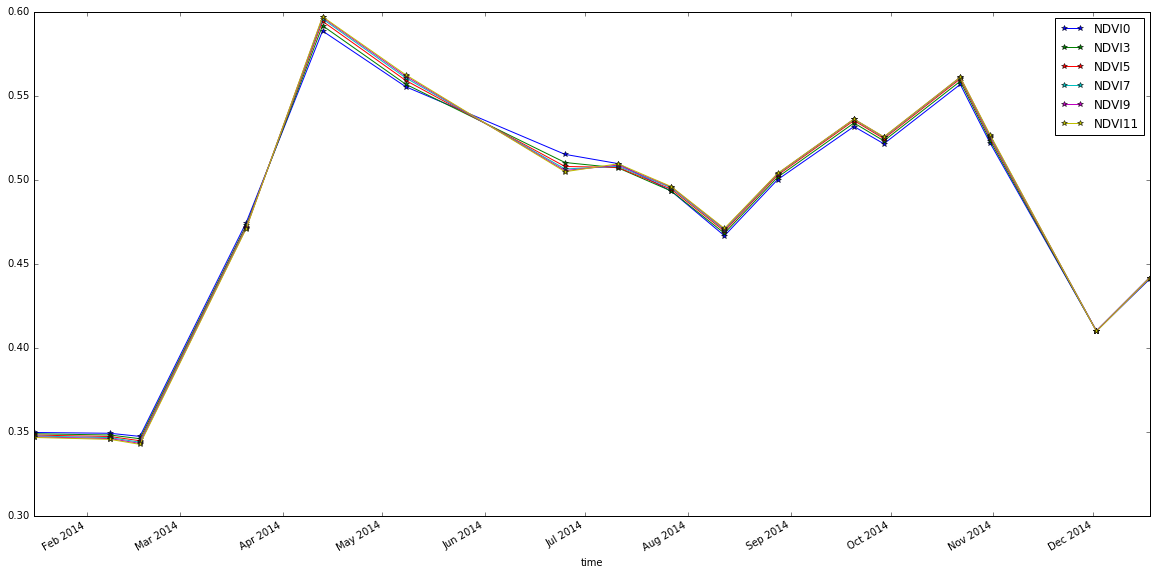

In [13]:

pdframe.plot(figsize=(20,10),marker='*')

# Further Analysis


1) use stats quartil to select a subset of images with lower ndvi

2) do a synthetic image of bands: mean, median

3) display the synthetic image, export to tiff

4) produce natural color and NDVI combined video

In [ ]:
prod_type='ls5_nbar_albers'

pq_prod_type = prod_type.replace('nbar','pq')

good_ndvi=get_ndvi(prod_type, xp,yp,tp,cloudfreeRatio = 0.5)

print (good_ndvi.shape)

In [ ]:
good_ndvi[:20].plot(col='time', col_wrap=5, add_colorbar=False)

In [ ]:
img1=good_ndvi[7]
#mask = ~np.isnan(img1); img1f = median(img1,disk(5), mask=mask)
img1f = filter_center(img1, size=3, func=np.nanmedian )

In [ ]:
plt.imshow(img1f)


In [ ]:
plt.imshow(img1)

In [ ]:
np.nanmean(img1f)

In [ ]:
img1.mean()

In [ ]:

ndvi578.plot( figsize=(20,10),  marker='*' )

In [ ]:
#ndvi_mean

In [ ]:
outcsvfile='meanNDVI578_%s.csv'% (AOI_NAME)

ndvi578.to_csv(outcsvfile)  #('/tmp/meanNDVI578_FireScarNT.csv')

In [ ]:
ndvi578.hist(bins=100)

In [ ]:
p10= ndvi578.quantile(0.1)
p90= ndvi578.quantile(0.9)

bot_tenperc=ndvi578[(ndvi578['NDVI'] <= p10[0])].dropna()
top_tenperc=ndvi578[(ndvi578['NDVI'] >= p90[0])].dropna()

In [ ]:
outcsvfile2='meanNDVI578_%s_bot10pc.csv'% (AOI_NAME)
bot_tenperc.to_csv(outcsvfile2)

outcsvfile3='meanNDVI578_%s_top10pc.csv'% (AOI_NAME)
top_tenperc.to_csv(outcsvfile3)

In [ ]:
top_tenperc.head

In [ ]:
p10

In [ ]:
bot_tenperc.head(100)

In [ ]:
ndvidf21.plot(figsize=(20,10), marker='o' )

In [ ]:
stop


## First Experiment: Keep this section for reference.

In [ ]:
#Keep this section for reference.

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median
# >>> img = data.camera()
# >>> med = median(img, disk(5))

def filtered_ndvi_mean(ndvi_imgs, ndisk=5):
    """ apply a spatial filter to the input ndvi_imgs array
    return a pandas dataframe of mean NDVI for the images.
    ndisk=5 is the default size of the disk filter
    See http://scikit-image.org/docs/stable/api/skimage.filters.html?highlight=local%20median%20filter
    """

    mydict={}
    for it in xrange(0, len(ndvi_imgs.time)):
        # apply median filter to get an image meds for this timeslice
        img=ndvi_imgs.isel(time=it)
        imask= ~np.isnan(img)
        meds = median(img,disk(ndisk), mask=imask)  
        #plt.imshow(meds)
        mydict.update({ndvi_imgs.time[it].values: meds.mean()})

    # convert mydict to pandas dataframe, with proper column names and index
    pdf=pandas.DataFrame(mydict.items(), columns=['Date', 'NDVI'])
    pdf.set_index('Date', inplace=True)
    
    return pdf

###################
scaled_good_ndvi = 128*(1+good_ndvi) # to unint8 or uint16 a requirement for scikit-image filter input

uint8_good_ndvi=scaled_good_ndvi.astype('uint8')

pdf5 = filtered_ndvi_mean( uint8_good_ndvi, ndisk=5)

pdf5.head()

pdf0=filtered_ndvi_mean( uint8_good_ndvi, ndisk=0)

# plt.figure( )
pdf0.plot(figsize=(20,10), marker='*' )

pdf5.plot(figsize=(20,10), marker='*' )

pdf10 = filtered_ndvi_mean( uint8_good_ndvi, ndisk=10)

print(pdf10.shape)
pdf10.plot(figsize=(20,10), marker='*' )


In [ ]:
done

## Normalised Difference Water Index

In [ ]:
# images after removed invalid pixels. 
#ndwi.plot(col='time', col_wrap=6)


### Weed out the low quality images.

In [ ]:
# apply the cloud_threshold mask, which will select a subset images with good pixels. 

mostly_good_ndwi = ndwi.where(mostly_cloud_free).dropna('time', how='all')

mostly_good_ndwi.plot(col='time', col_wrap=5)

## Statistics Median and Mean Images (Synthetic)


### Normalised Vegetation Index vs Water Index

In [ ]:
plt.figure( figsize=(16,12) )
    
plt.subplot( 2,2,1 )
mostly_good_ndvi.median(dim='time').plot()
plt.title("Median Normalised Difference Vegetation Index - NDVI"); plt.xlabel('easting'); plt.ylabel('northing')


plt.subplot( 2,2,2 )
mostly_good_ndvi.mean(dim='time').plot()
# ndvi.mean(dim='time').plot()
plt.title("Mean Normalised Difference Vegetation Index - NDVI"); plt.xlabel('easting'); plt.ylabel('northing')

#------------------------------
plt.subplot( 2,2,3 )
mostly_good_ndwi.median(dim='time').plot()
plt.title("Median Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')


plt.subplot( 2,2,4 )
mostly_good_ndwi.mean(dim='time').plot()
# ndwi.mean(dim='time').plot()
plt.title("Mean Normalised Difference Water Index - NDWI"); plt.xlabel('easting'); plt.ylabel('northing')